MNIST 데이터셋을 이용하여 CNN 모델에 대해 알아본다.

In [ ]:
import numpy as np
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape[1:])
print(' 훈련셋  개수', x_train.shape[0])
print('테스트셋 개수', x_test.shape[0])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(28, 28)
 훈련셋  개수 60000
테스트셋 개수 10000


MNIST 데이터셋은 아래 이미지와 같은 (28, 28)크기의 0 ~ 9의 손글씨 숫자 데이터이다.

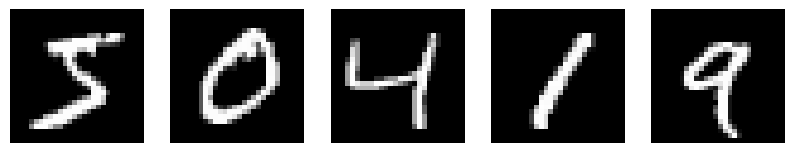

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 3))

for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.imshow(x_train[i], cmap = 'gray')
  plt.axis('off')

plt.show()

합성곱 신경망 Convolution Neural Networks (CNN, ConvNet)은 컴퓨터 비전에서 가장 많이 사용되는 알고리즘 중 하나이다.

CNN 모델은 다른 모델처럼 입력층, 출력층과 그 사이의 몇 개의 은닉층으로 구성된다.

은닉층의 대표적인 구성 요소로는 다음과 같은 층이 있다.


*   **Conv2D** : 합성곱 층, 입력된 데이터의 패턴을 찾아냄
*   **MaxPooling2D** : 풀링층, 입력된 데이터의 높이와 너비를 지정한 비율만큼 축소
*   **Flatten** : 평탄화 층, 입력받은 데이터를 1D(1차원)어레이로 변환
*   **Dense** : CNN 모델의 일반적인 출력층



### 합성곱 층

데이터에서 위치와 관계없이 패턴을 찾아낸다. (다른 위치여도 동일한 패턴이라면 동일한 값으로 본다.)

또한 합성곱 연산을 여러번 반복한다면 패턴 속 패턴 즉, 상세한 패턴을 찾아낼 수 있다.

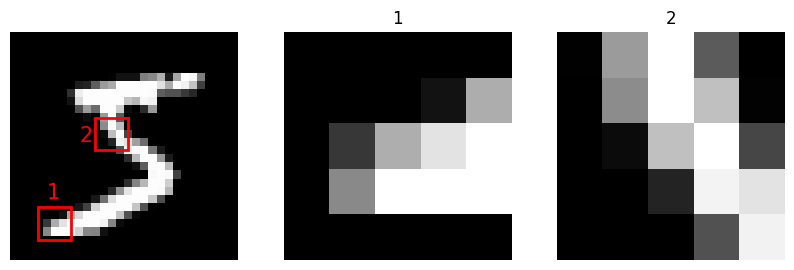

In [ ]:
import matplotlib.patches as patches

x = x_train[0]

fig, axs = plt.subplots(ncols = 3, figsize = (10, 3))
axs = axs.flatten()

plt.sca(axs[0])
plt.imshow(x, cmap = 'gray')

box_1 = patches.Rectangle((3, 21), 4, 4, linewidth = 2, edgecolor = 'red', facecolor = 'none')
axs[0].add_patch(box_1)
plt.text(4, 20, '1', fontsize = 15, color = 'red')

box_2 = patches.Rectangle((10, 10), 4, 4, linewidth = 2, edgecolor = 'red', facecolor = 'none')
axs[0].add_patch(box_2)
plt.text(8, 13, '2', fontsize = 15, color = 'red')

plt.axis('off')

plt.sca(axs[1])
plt.imshow(x[21:26, 3:8], cmap = 'gray')
plt.title(1)
plt.axis('off')

plt.sca(axs[2])
plt.imshow(x[10:15, 10:15], cmap = 'gray')
plt.title(2)
plt.axis('off')

plt.show()

Conv2D층의 주요 파라미터는 다음과 같다.

```python
layers.Conv2D(
  filters = 32,
  kernel_size = 3,
  strides = 1,
  padding = 'same',
  activation = 'relu'
)
```



*   filters : 필터 개수, 필터 개수는 층 통과 시 채널의 개수 (채널 : 데이터의 특성, 흑백 이미지는 채널이 1개, RGB 이미지는 채널이 3개)
*   kernel_size : 커널의 크기
*   strides : 보폭, 합성곱 연산 시 커널을 몇 만큼 이동할 것인지 지정
*   padding : 패딩의 여부, 'same' 지정 시 보폭이 1인 경우 출력 데이터의 (가로, 세로)는 입력 데이터와 동일
*   activation : 활성화 함수, 대부분 relu 사용. (relu 함수 : 0 이하인 값을 0으로 설정)



In [ ]:
from keras import layers
import tensorflow as tf

sample = x_train[0]
sample = tf.expand_dims(sample, axis = 0)   # 0번 차원 : 배치 크기
sample = tf.expand_dims(sample, axis = -1)  # 3번 차원 : 채널 수
print('기존 데이터의 모양', sample.shape)

rescaled_sample = layers.Rescaling(1./255)(sample)

x = layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')(rescaled_sample) # 필터 개수 32개, padding = 'same'을 사용하여 원본과 같은 크기를 유지
print('filter : 32, kernel_size : 3, padding : same, strides : none', x.shape)

x = layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu')(rescaled_sample) # 필터 개수 64개, padding을 사용하지 않아 (가로, 세로) 2씩 감소
print('filter : 64, kernel_size : 3, padding : none, strides : none', x.shape)

x = layers.Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same', activation = 'relu')(rescaled_sample) # 필터 개수 32개, 보폭 2로 지정, (가로, 세로) 비율이 절반으로 감소
print('filter : 32, kernel_size : 3, padding : same, strides : 2   ', x.shape)

x = layers.Conv2D(filters = 32, kernel_size = 3, strides = 2, activation = 'relu')(rescaled_sample) # 필터 개수 32개, 보폭 2로 지정, (가로, 세로) 2씩 감소 및 절반으로 감소
print('filter : 32, kernel_size : 3, padding : none, strides : 2   ', x.shape)

x = layers.Conv2D(filters = 32, kernel_size = 5, activation = 'relu')(rescaled_sample) # 필터 개수 32개, 커널의 크기 5, (가로, 세로) 4씩 감소
print('filter : 32, kernel_size : 5, padding : none, strides : none', x.shape)

기존 데이터의 모양 (1, 28, 28, 1)
filter : 32, kernel_size : 3, padding : same, strides : none (1, 28, 28, 32)
filter : 64, kernel_size : 3, padding : none, strides : none (1, 26, 26, 64)
filter : 32, kernel_size : 3, padding : same, strides : 2    (1, 14, 14, 32)
filter : 32, kernel_size : 3, padding : none, strides : 2    (1, 13, 13, 32)
filter : 32, kernel_size : 5, padding : none, strides : none (1, 24, 24, 32)


활성화 함수 Relu는 0이하의 값(음수)를 0으로 만드는 효과를 가지고 있다.

In [ ]:
sample = tf.convert_to_tensor(np.arange(-3, 4))
print(sample)

x = layers.ReLU()
x = x(sample)

print(x)

tf.Tensor([-3 -2 -1  0  1  2  3], shape=(7,), dtype=int64)
tf.Tensor([0 0 0 0 1 2 3], shape=(7,), dtype=int64)


### 풀링 층
풀링은 지정한 크기만큼의 영역 안에서 특정한 값을 하나만 선택한다. 여러 값들 중 하나만 선택하기 때문에 입력 데이터에서 크기가 감소한다.

CNN에서 많이 사용되는 MaxPooing은 최댓값을 선택한다.

MaxPooling2D층의 주요 파라미터는 다음과 같다.

```python
layers.MaxPooling2D(
  pool_size = (2, 2),
  strides = 1,
  padding
)
```



*   pool_size : 풀링 영역의 크기 지정
*   strides : 보폭, 풀링 영역을 얼마나 이동할 것인지 지정
*   paading : 패딩 여부



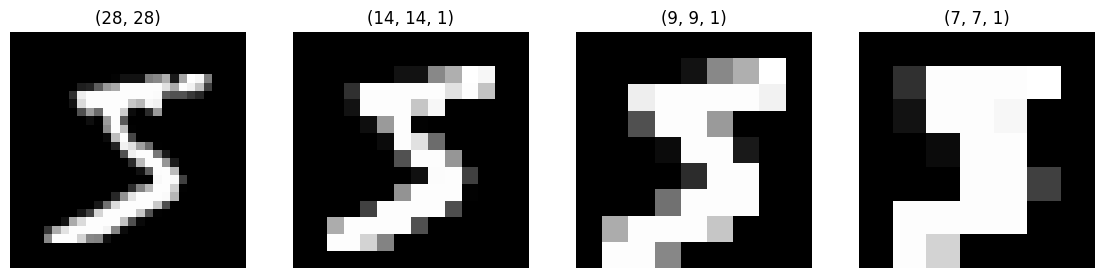

In [ ]:
sample = x_train[0]

plt.figure(figsize = (14, 4))

plt.subplot(1, 4, 1)
plt.imshow(sample, cmap = 'gray') # 원본 이미지
plt.title(sample.shape) # 원본 이미지의 모양
plt.axis('off')

sample = tf.expand_dims(sample, axis = 0)
sample = tf.expand_dims(sample, axis = -1)

x = layers.MaxPooling2D(pool_size = (2, 2))(sample) # 풀링 영역의 크기를 (2 x 2)로 지정
x = tf.squeeze(x, axis = 0)

plt.subplot(1, 4, 2)
plt.imshow(x, cmap = 'gray')
plt.title(x.shape)
plt.axis('off')

x = layers.MaxPooling2D(pool_size = (3, 3))(sample) # 풀링 영역의 크기를 (3 x 3)로 지정
x = tf.squeeze(x, axis = 0)

plt.subplot(1, 4, 3)
plt.imshow(x, cmap = 'gray')
plt.title(x.shape)
plt.axis('off')

x = layers.MaxPooling2D(pool_size = (4, 4))(sample) # 풀링 영역의 크기를 (4 x 4)로 지정
x = tf.squeeze(x, axis = 0)

plt.subplot(1, 4, 4)
plt.imshow(x, cmap = 'gray')
plt.title(x.shape)
plt.axis('off')

plt.show()

위의 그림에서 알 수 있듯이 풀링의 영역이 2, 3, 4로 증가할수록 풀링 후 데이터의 크기는 1/2, 1/3, 1/4로 감소한다. (동일한 비율만큼 감소함)

또한 풀링 영역이 커질수록 해상도가 나빠진다.

이번에는 보폭과 패딩을 사용해보자.

보폭, 패딩 모두 사용 (14, 14, 1)
패딩만 사용 (28, 28, 1)
보폭만 사용 (14, 14, 1)


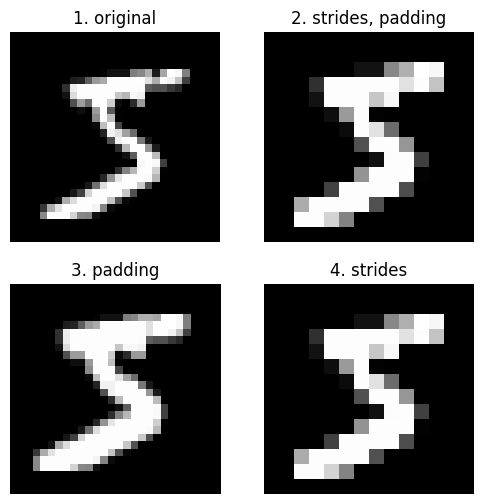

In [ ]:
sample = x_train[0]

plt.figure(figsize = (6, 6))

plt.subplot(2, 2, 1)
plt.imshow(sample, cmap = 'gray') # 원본 이미지
plt.title('1. original') # 원본 이미지의 모양
plt.axis('off')

sample = tf.expand_dims(sample, axis = 0)
sample = tf.expand_dims(sample, axis = -1)

x = layers.MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'same')(sample) # 보폭을 2로 지정, 패딩 사용
x = tf.squeeze(x, axis = 0)
print('보폭, 패딩 모두 사용', x.shape)

plt.subplot(2, 2, 2)
plt.imshow(x, cmap = 'gray')
plt.title('2. strides, padding')
plt.axis('off')

x = layers.MaxPooling2D(pool_size = (2, 2), strides = 1, padding = 'same')(sample) # 패딩만 사용
x = tf.squeeze(x, axis = 0)
print('패딩만 사용', x.shape)

plt.subplot(2, 2, 3)
plt.imshow(x, cmap = 'gray')
plt.title('3. padding')
plt.axis('off')

x = layers.MaxPooling2D(pool_size = (2, 2), strides = 2)(sample) # 보폭만 2로 지정
x = tf.squeeze(x, axis = 0)
print('보폭만 사용', x.shape)

plt.subplot(2, 2, 4)
plt.imshow(x, cmap = 'gray')
plt.title('4. strides')
plt.axis('off')

plt.show()

1, 3번 이미지를 보면 3번은 보폭을 1로 지정하여 (가로, 세로)가 달라지지 않았지만 영역의 최댓값을 선택하기 때문에 원본과 이미지가 다르다.

2, 4번 이미지는 동일한 것처럼 보인다.

사실 **풀링 영역의 크기가 보폭 크기다.** 영역의 크기가 (2, 2) 이므로 'strides = 2'를 지정한 것이 의미가 없다.

보폭을 영역보다 크게 지정하면 아래 이미지처럼 바뀐다.

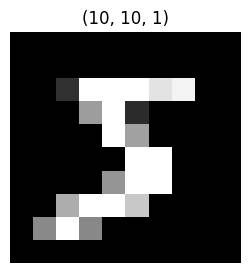

In [ ]:
x = layers.MaxPooling2D(pool_size = (2, 2), strides = 3, padding = 'same')(sample) # 보폭을 3으로 변경
x = tf.squeeze(x, axis = 0)

plt.figure(figsize = (3 , 3))

plt.imshow(x, cmap = 'gray')
plt.title(x.shape)
plt.axis('off')

plt.show()

### Flatten

평탄화 층은 입력 데이터를 1D(1차원)으로 변경한다.

In [ ]:
sample = tf.convert_to_tensor(np.arange(9).reshape((3, 3)))
print(sample.numpy())

sample = tf.expand_dims(sample, axis = 0)

x = layers.Flatten()(sample)
print(x.numpy())

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 1 2 3 4 5 6 7 8]]


### 모델 훈련

이제 CNN 모델을 훈련시켜보자. CNN 모델의 구조는 일반적으로

**입력층 -> 합성곱 -> 풀링 -> 합성곱 -> 풀링 -> ... -> 평탄화 -> 출력층**

를 따른다.

In [ ]:
inputs = keras.Input(shape = (28, 28, 1))

x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.25)(x)

outputs = layers.Dense(10, activation = 'softmax')(x)

model = keras.Model(inputs = inputs, outputs = outputs)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
x_test_sample = x_test[:5]

In [ ]:
x_train = tf.expand_dims(x_train, -1)
x_test = tf.expand_dims(x_test, -1)

In [ ]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(x_train, y_train, batch_size = 64, epochs = 15, validation_split = 0.2)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8299 - loss: 0.5814 - val_accuracy: 0.9764 - val_loss: 0.0780
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9710 - loss: 0.0925 - val_accuracy: 0.9829 - val_loss: 0.0583
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9795 - loss: 0.0674 - val_accuracy: 0.9844 - val_loss: 0.0525
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9840 - loss: 0.0539 - val_accuracy: 0.9854 - val_loss: 0.0500
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9860 - loss: 0.0426 - val_accuracy: 0.9861 - val_loss: 0.0475
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9874 - loss: 0.0401 - val_accuracy: 0.9873 - val_loss: 0.0440
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9897 - loss: 0.0312 - val_accuracy: 0.9874 - val_loss: 0.0426
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9909 - loss: 0.0277 - val_accuracy: 0.

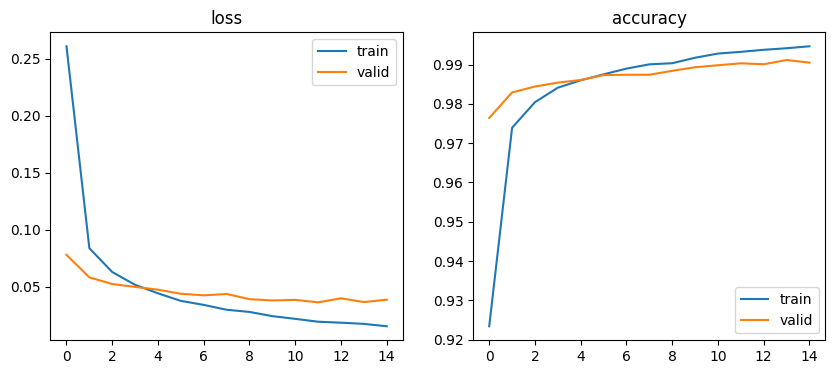

In [ ]:
plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)

plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.title('loss')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'valid')
plt.title('accuracy')
plt.legend()

plt.show()

CNN 모델은 MNIST 데이터셋 분류에 대해 0.99가 넘는 압도적인 성능을 보여준다.

이제 테스트셋에 대해 모델의 성능을 확인해본다.

In [ ]:
model.evaluate(x_test, y_test, batch_size = 64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9891 - loss: 0.0345


[0.028107324615120888, 0.991100013256073]

테스트셋에 대해서도 0.99의 정확도를 보인다.

처음 5개의 데이터에 대해 확인해본다.

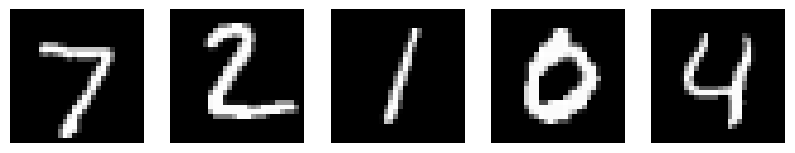

In [ ]:
plt.figure(figsize = (10, 4))

for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.imshow(x_test_sample[i], cmap = 'gray')
  plt.axis('off')

plt.show()

In [ ]:
sample = x_test[:5]

x = model.predict(sample)
x = keras.ops.argmax(x, axis = 1)
x.numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([7, 2, 1, 0, 4], dtype=int32)